In [112]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV
from hypopt import GridSearch

from umap import UMAP

In [49]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/2024-06-06/18-01-17_177"
ukb_emb_file = f"{model_path}/ukb_random_epoch70_embeddings/full_embeddings.csv"
schiz_emb_file = f"{model_path}/schiz_female_train_val_test_intra_test_epoch70_embeddings/full_embeddings.csv"
schiz_path = "/neurospin/dico/data/deep_folding/current/datasets/schiz_extended"
schiz_label_file = f"{schiz_path}/used_schiz_subjects.csv"
train_file = f"{schiz_path}/train_female_subjects.csv"
val_file = f"{schiz_path}/val_female_subjects.csv"
test_intra_file = f"{schiz_path}/test_intra_female_subjects.csv"
test_file = f"{schiz_path}/test_female_subjects.csv"

In [50]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-3.846989,296.112670,-4.043105,-7.439207,301.850500,143.976650,-3.979062,-1.844116,638.230100,-4.486217,...,85.449950,-4.167051,-5.370148,22.557917,-3.316707,-5.533756,-0.738699,647.650000,520.635000,39.046080
sub-1000458,-0.963846,-2.763270,-2.749146,332.419160,-0.607741,-11.909106,-1.713533,36.063786,-1.743204,-1.075689,...,-2.655420,79.728455,-2.831465,947.236700,-0.269171,-4.136950,-5.516788,958.938000,-1.273631,42.915073
sub-1000575,-8.734442,212.828190,337.274380,-7.518422,52.094826,-2.100449,-4.579330,-2.693566,68.262460,-4.528482,...,-3.351587,-3.363573,-4.379759,60.145270,-8.196051,-5.846061,-9.001899,303.867500,743.589050,-2.571651
sub-1000606,-6.688346,258.076870,188.603440,-8.550046,347.732060,-8.560782,-3.020614,378.195860,294.636870,25.549576,...,-1.692812,149.986650,-5.313388,435.498930,-8.501763,-2.454086,-10.787764,547.278000,200.317370,143.430240
sub-1000963,-4.436814,17.974005,326.154240,-4.641853,244.947680,-6.841083,-5.439133,-1.225982,11.269929,-2.981624,...,183.407520,179.920290,-9.577338,348.465480,-0.469651,-10.204051,-2.419825,1063.851400,72.442080,-5.214727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-9.169163,135.433200,884.786300,-6.432162,-1.203326,-0.793486,-2.684862,-2.929144,-2.228254,246.412900,...,-3.288083,-1.789764,222.748410,-1.433313,-10.344556,87.075930,-11.135690,-6.113844,766.153100,-1.564732
sub-6023808,-4.615266,240.809560,-1.002449,-4.186277,147.487300,-3.379099,-4.442202,-3.758578,232.380050,-3.494583,...,-0.230244,-3.564494,-3.555640,513.210140,-4.351436,-4.881495,-4.564982,665.582760,698.218570,133.387280
sub-6023847,-8.966642,31.202654,662.213260,-3.839128,-1.025877,-9.494379,-3.436668,117.865410,-3.054445,307.964450,...,-3.963376,191.120090,-2.831696,578.378500,-8.464498,-4.349554,-14.017641,78.939830,718.248170,-2.145509


In [51]:
schiz_emb = pd.read_csv(schiz_emb_file, index_col=0)
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-10217_ses-1,-7.303114,34.447258,131.087550,-2.896019,-0.009779,-9.400747,-4.240936,37.858696,19.092310,336.924220,...,-0.728491,94.658180,-3.733776,752.446350,-4.873403,-6.125661,-9.496440,482.982240,776.965200,-0.985697
sub-10227_ses-1,-7.255138,71.811840,446.643600,-2.263124,-0.226223,-11.658331,-3.756520,193.563720,-1.477181,680.908600,...,-1.296398,365.384500,-2.556537,935.745400,-6.161896,-4.050441,-12.093735,261.205230,714.696100,19.866453
sub-10228_ses-1,-7.700627,147.012740,867.295400,-4.635996,38.919025,-8.066437,-3.051848,31.130419,-2.277546,560.107500,...,-1.381512,262.717300,-0.491520,512.868500,-8.637555,-0.666504,-12.142413,-1.134983,617.454650,35.851500
sub-10271_ses-1,-5.465827,-3.795969,290.111820,-0.973570,-1.675095,-6.306929,-3.103825,-3.844789,-4.360286,-8.065597,...,-3.732769,-2.572527,-5.227365,49.214090,-2.103295,-8.283302,-5.429464,757.253300,21.435620,-7.549537
sub-10273_ses-1,-7.072738,285.888640,303.963800,-10.303687,407.007750,-6.476595,-3.352321,240.982300,288.329100,-2.733365,...,-1.563733,11.210472,-6.285584,179.022960,-9.011083,-2.947566,-9.912494,574.433960,163.267170,27.624163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-sf100462_ses-v1,-5.280408,132.336330,476.846200,-7.920975,308.426420,-5.601792,-3.576547,-1.595344,-0.335301,-8.522347,...,-2.810954,-1.122972,-6.892854,40.887142,-6.679943,-4.204084,-7.194947,839.864400,-3.065491,-2.266448
sub-sl130123_ses-v1,-6.293394,-0.029284,670.906100,-9.931320,422.495300,-5.759251,-4.426641,-1.831407,-0.287278,-9.126422,...,29.120497,16.923481,-9.727980,-3.048033,-4.520477,-7.197303,-4.303663,1058.677100,-5.412412,-6.680774
sub-sp110461_ses-v1,-1.444663,1.905487,-4.333265,-3.377739,364.561220,-7.764346,-3.648247,-0.494624,397.715880,-4.246835,...,205.452400,-0.499282,-7.081393,576.268200,19.160046,-6.650568,-0.572366,1355.715000,-1.569065,37.451378


In [52]:
schiz_label = pd.read_csv(schiz_label_file, index_col=0)
schiz_label

,sex,age,diagnosis,study,site
participant_id,,,,,
sub-INV07WT2ZL3,M,29,control,BSNIP,Dallas
sub-INV0AL14J6U,M,43,schizophrenia,BSNIP,Dallas
sub-INV14XK7P6E,M,30,control,BSNIP,Dallas
sub-INV1HXNTXYF,F,18,control,BSNIP,Dallas
sub-INV1XCNF4J5,F,25,control,BSNIP,Dallas
...,...,...,...,...,...
182,M,53,schizophrenia,PreCatatoes,Sainte-Anne
183,F,19,schizophrenia,PreCatatoes,Sainte-Anne
184,M,26,control,PreCatatoes,Sainte-Anne


In [53]:
schiz_train = pd.read_csv(train_file, header=None)
schiz_val = pd.read_csv(val_file, header=None)
schiz_test_intra = pd.read_csv(test_intra_file, header=None)
schiz_test = pd.read_csv(test_file, header=None)
schiz_train

,0
0,sub-INV25C66ABC
1,sub-INV4FRH8AGB
2,sub-INV55WRBHP3
3,sub-INV6GG8BG9T
4,sub-INV72530YM1
...,...
400,sub-ESOC10099_ses-v1
401,sub-ESOC10013_ses-v1
402,sub-ESOC10060_ses-v1
403,sub-ESOC10019_ses-v1


In [54]:
np.unique(schiz_label.diagnosis)

array(['control', 'schizophrenia'], dtype=object)

# UKBioBank

In [55]:
norm = ukb_emb.apply(np.linalg.norm, axis=1)
ukb_emb = ukb_emb.div(norm, axis=0)

In [56]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.000668,0.051396,-0.000702,-0.001291,0.052392,0.024990,-0.000691,-0.000320,0.110778,-0.000779,...,0.014832,-0.000723,-0.000932,0.003915,-0.000576,-0.000960,-0.000128,0.112413,0.090367,0.006777
sub-1000458,-0.000096,-0.000276,-0.000275,0.033195,-0.000061,-0.001189,-0.000171,0.003601,-0.000174,-0.000107,...,-0.000265,0.007962,-0.000283,0.094590,-0.000027,-0.000413,-0.000551,0.095758,-0.000127,0.004285
sub-1000575,-0.001780,0.043371,0.068732,-0.001532,0.010616,-0.000428,-0.000933,-0.000549,0.013911,-0.000923,...,-0.000683,-0.000685,-0.000893,0.012257,-0.001670,-0.001191,-0.001834,0.061924,0.151533,-0.000524
sub-1000606,-0.001094,0.042202,0.030841,-0.001398,0.056863,-0.001400,-0.000494,0.061844,0.048180,0.004178,...,-0.000277,0.024526,-0.000869,0.071215,-0.001390,-0.000401,-0.001764,0.089493,0.032757,0.023454
sub-1000963,-0.000963,0.003902,0.070807,-0.001008,0.053178,-0.001485,-0.001181,-0.000266,0.002447,-0.000647,...,0.039817,0.039060,-0.002079,0.075651,-0.000102,-0.002215,-0.000525,0.230960,0.015727,-0.001132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-0.001271,0.018773,0.122646,-0.000892,-0.000167,-0.000110,-0.000372,-0.000406,-0.000309,0.034157,...,-0.000456,-0.000248,0.030877,-0.000199,-0.001434,0.012070,-0.001544,-0.000847,0.106201,-0.000217
sub-6023808,-0.000944,0.049260,-0.000205,-0.000856,0.030170,-0.000691,-0.000909,-0.000769,0.047536,-0.000715,...,-0.000047,-0.000729,-0.000727,0.104983,-0.000890,-0.000999,-0.000934,0.136152,0.142828,0.027286
sub-6023847,-0.001261,0.004388,0.093128,-0.000540,-0.000144,-0.001335,-0.000483,0.016576,-0.000430,0.043310,...,-0.000557,0.026878,-0.000398,0.081338,-0.001190,-0.000612,-0.001971,0.011101,0.101009,-0.000302


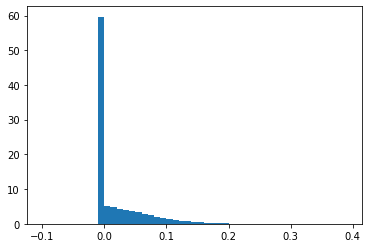

In [57]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

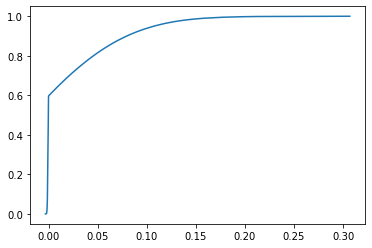

In [58]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [59]:
X2[int(N*0.59)]

-1.2471990042814564e-05

In [60]:
len(ukb_emb)

21051

In [61]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [62]:
ukb_positive

dim387    0.955679
dim344    0.948126
dim19     0.911833
dim146    0.911121
dim304    0.905658
            ...   
dim327    0.000000
dim166    0.000000
dim410    0.000000
dim7      0.000000
dim303    0.000000
Length: 512, dtype: float64

In [63]:
ukb_positive[10:50]

dim496    0.865470
dim357    0.836492
dim510    0.831599
dim77     0.830032
dim309    0.814688
dim55     0.812170
dim404    0.807848
dim492    0.807800
dim180    0.806470
dim475    0.806137
dim244    0.804190
dim297    0.802670
dim268    0.800532
dim437    0.799392
dim64     0.797967
dim140    0.796114
dim35     0.781151
dim3      0.766662
dim201    0.765427
dim491    0.757161
dim321    0.755499
dim204    0.752173
dim179    0.749133
dim115    0.747708
dim443    0.745523
dim122    0.744953
dim459    0.744858
dim352    0.743148
dim76     0.738730
dim511    0.738160
dim45     0.737162
dim97     0.728896
dim485    0.728659
dim379    0.728516
dim65     0.727614
dim429    0.726094
dim34     0.725951
dim487    0.725049
dim169    0.723196
dim263    0.720203
dtype: float64

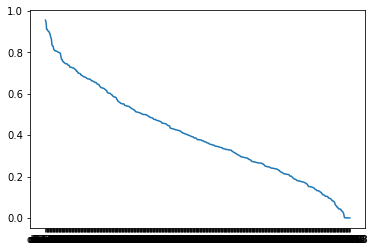

In [64]:
plt.plot(ukb_positive)

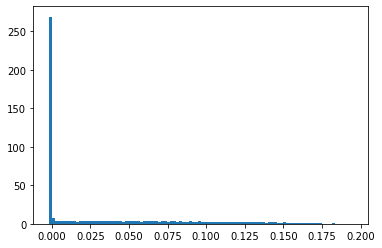

In [65]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

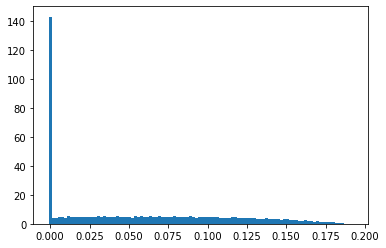

In [66]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

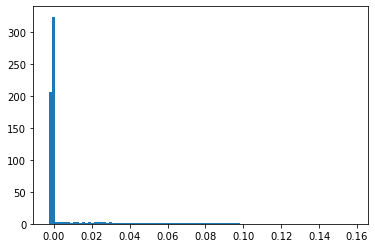

In [67]:
p = plt.hist(ukb_emb.loc[:,"dim188"], bins=100, density=True)

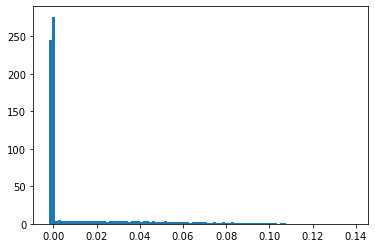

In [68]:
p = plt.hist(ukb_emb.loc[:,"dim10"], bins=100, density=True)

# Schizophrene

In [121]:
norm = schiz_emb.apply(np.linalg.norm, axis=1)
schiz_emb = schiz_emb.div(norm, axis=0)

In [122]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [123]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

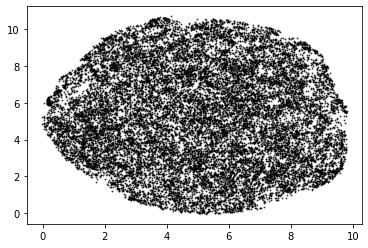

In [124]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [125]:
visual_schiz_emb = reducer.transform(schiz_emb)

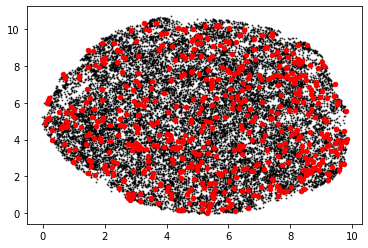

In [126]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)
plt.scatter(visual_schiz_emb[:,0], visual_schiz_emb[:,1], c='red', s=20, alpha=1)

In [75]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)

In [76]:
schiz_order = schiz_emb.copy()
schiz_order.loc["ukb_positive",:] = ukb_positive
schiz_order

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-10217_ses-1,-0.001299,0.006126,0.023312,-0.000515,-0.000002,-0.001672,-0.000754,0.006733,0.003395,0.059916,...,-0.000130,0.016833,-0.000664,0.133810,-0.000867,-0.001089,-0.001689,0.085890,0.138170,-0.000175
sub-10227_ses-1,-0.000972,0.009625,0.059865,-0.000303,-0.000030,-0.001563,-0.000504,0.025944,-0.000198,0.091265,...,-0.000174,0.048974,-0.000343,0.125422,-0.000826,-0.000543,-0.001621,0.035010,0.095793,0.002663
sub-10228_ses-1,-0.001164,0.022219,0.131080,-0.000701,0.005882,-0.001219,-0.000461,0.004705,-0.000344,0.084652,...,-0.000209,0.039706,-0.000074,0.077513,-0.001305,-0.000101,-0.001835,-0.000172,0.093320,0.005418
sub-10271_ses-1,-0.000848,-0.000589,0.045022,-0.000151,-0.000260,-0.000979,-0.000482,-0.000597,-0.000677,-0.001252,...,-0.000579,-0.000399,-0.000811,0.007638,-0.000326,-0.001285,-0.000843,0.117518,0.003327,-0.001172
sub-10273_ses-1,-0.001248,0.050431,0.053619,-0.001818,0.071797,-0.001142,-0.000591,0.042509,0.050862,-0.000482,...,-0.000276,0.001978,-0.001109,0.031580,-0.001590,-0.000520,-0.001749,0.101331,0.028800,0.004873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-sl130123_ses-v1,-0.001013,-0.000005,0.107985,-0.001598,0.068002,-0.000927,-0.000712,-0.000295,-0.000046,-0.001469,...,0.004687,0.002724,-0.001566,-0.000491,-0.000728,-0.001158,-0.000693,0.170399,-0.000871,-0.001075
sub-sp110461_ses-v1,-0.000209,0.000275,-0.000626,-0.000488,0.052663,-0.001122,-0.000527,-0.000071,0.057453,-0.000613,...,0.029679,-0.000072,-0.001023,0.083246,0.002768,-0.000961,-0.000083,0.195842,-0.000227,0.005410
sub-st110288_ses-v1,-0.000801,-0.000567,0.121957,0.003591,-0.000214,-0.001512,-0.000721,-0.000632,-0.001169,-0.001016,...,-0.000371,0.018203,-0.001206,0.046660,-0.000057,-0.001616,-0.000864,0.150113,-0.000279,-0.001489


In [77]:
schiz_order = schiz_order.sort_values(schiz_order.last_valid_index(), ascending=False, axis=1)

In [78]:
schiz_order

,dim387,dim344,dim19,dim146,dim304,dim138,dim346,dim334,dim432,dim385,...,dim316,dim71,dim47,dim373,dim384,dim327,dim166,dim410,dim7,dim303
ID,,,,,,,,,,,,,,,,,,,,,
sub-10217_ses-1,0.024165,0.125041,0.045065,0.181190,0.128892,0.023589,0.097353,0.122582,0.146007,0.212142,...,-0.000402,-0.000393,-0.000149,-0.000361,-0.000229,-0.000300,-0.000369,-0.000267,-0.000754,-0.000153
sub-10227_ses-1,0.018724,0.095193,0.038830,0.166148,0.050501,0.012418,0.019585,0.057616,0.120978,0.197981,...,-0.000318,-0.000327,-0.000067,-0.000323,-0.000153,-0.000138,-0.000202,-0.000176,-0.000504,-0.000124
sub-10228_ses-1,0.054332,0.075837,0.052679,0.174867,0.012726,0.018733,-0.000413,0.021270,0.103841,0.161386,...,-0.000368,-0.000396,-0.000043,-0.000387,-0.000172,-0.000163,-0.000237,-0.000148,-0.000461,-0.000138
sub-10271_ses-1,0.029391,0.007136,0.113223,-0.000238,0.056797,0.023435,0.071729,0.069325,0.033277,0.061522,...,-0.000451,-0.000239,-0.000081,-0.000232,-0.000236,-0.000304,-0.000305,-0.000270,-0.000482,-0.000113
sub-10273_ses-1,0.060917,0.139700,0.155856,0.192357,0.056850,0.119061,0.090369,0.028015,0.116711,0.203025,...,-0.000677,-0.000472,-0.000085,-0.000258,-0.000183,-0.000252,-0.000235,-0.000238,-0.000591,-0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-sl130123_ses-v1,0.076156,0.078482,0.181749,0.152565,-0.000417,0.144703,0.033341,-0.000192,-0.000254,0.138710,...,-0.000772,-0.000408,-0.000115,-0.000243,-0.000216,-0.000280,-0.000378,-0.000305,-0.000712,-0.000171
sub-sp110461_ses-v1,0.019748,0.132358,0.058500,0.078455,0.103744,0.094372,0.175006,0.050269,0.011219,0.133310,...,-0.000323,-0.000099,-0.000150,-0.000149,-0.000192,-0.000336,-0.000299,-0.000184,-0.000527,-0.000108
sub-st110288_ses-v1,0.035471,0.026097,0.142418,0.088604,-0.000391,0.067177,-0.000093,0.010223,0.009418,0.166708,...,-0.000668,-0.000384,-0.000088,-0.000341,-0.000246,-0.000235,-0.000370,-0.000366,-0.000721,-0.000188


# Fit on schiz datasets

In [79]:
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-10217_ses-1,-0.001299,0.006126,0.023312,-0.000515,-0.000002,-0.001672,-0.000754,0.006733,0.003395,0.059916,...,-0.000130,0.016833,-0.000664,0.133810,-0.000867,-0.001089,-0.001689,0.085890,0.138170,-0.000175
sub-10227_ses-1,-0.000972,0.009625,0.059865,-0.000303,-0.000030,-0.001563,-0.000504,0.025944,-0.000198,0.091265,...,-0.000174,0.048974,-0.000343,0.125422,-0.000826,-0.000543,-0.001621,0.035010,0.095793,0.002663
sub-10228_ses-1,-0.001164,0.022219,0.131080,-0.000701,0.005882,-0.001219,-0.000461,0.004705,-0.000344,0.084652,...,-0.000209,0.039706,-0.000074,0.077513,-0.001305,-0.000101,-0.001835,-0.000172,0.093320,0.005418
sub-10271_ses-1,-0.000848,-0.000589,0.045022,-0.000151,-0.000260,-0.000979,-0.000482,-0.000597,-0.000677,-0.001252,...,-0.000579,-0.000399,-0.000811,0.007638,-0.000326,-0.001285,-0.000843,0.117518,0.003327,-0.001172
sub-10273_ses-1,-0.001248,0.050431,0.053619,-0.001818,0.071797,-0.001142,-0.000591,0.042509,0.050862,-0.000482,...,-0.000276,0.001978,-0.001109,0.031580,-0.001590,-0.000520,-0.001749,0.101331,0.028800,0.004873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-sf100462_ses-v1,-0.000939,0.023524,0.084763,-0.001408,0.054825,-0.000996,-0.000636,-0.000284,-0.000060,-0.001515,...,-0.000500,-0.000200,-0.001225,0.007268,-0.001187,-0.000747,-0.001279,0.149292,-0.000545,-0.000403
sub-sl130123_ses-v1,-0.001013,-0.000005,0.107985,-0.001598,0.068002,-0.000927,-0.000712,-0.000295,-0.000046,-0.001469,...,0.004687,0.002724,-0.001566,-0.000491,-0.000728,-0.001158,-0.000693,0.170399,-0.000871,-0.001075
sub-sp110461_ses-v1,-0.000209,0.000275,-0.000626,-0.000488,0.052663,-0.001122,-0.000527,-0.000071,0.057453,-0.000613,...,0.029679,-0.000072,-0.001023,0.083246,0.002768,-0.000961,-0.000083,0.195842,-0.000227,0.005410


In [89]:
schiz_all = pd.merge(schiz_label, schiz_emb, left_index=True, right_index=True)

In [90]:
schiz_all = schiz_all[schiz_all['sex'] == 'F']

In [91]:
d = {'control': 0, "schizophrenia": 1}
train = schiz_all.loc[schiz_all.index.isin(schiz_train[0]),:]
y_train = train['diagnosis'].map(d)
X_train = train.iloc[:, 5:]
val = schiz_all.loc[schiz_all.index.isin(schiz_val[0]),:]
y_val = val['diagnosis'].map(d)
X_val = val.iloc[:, 5:]
test_intra = schiz_all.loc[schiz_all.index.isin(schiz_test_intra[0]),:]
y_test_intra = test_intra['diagnosis'].map(d)
X_test_intra = test_intra.iloc[:, 5:]
test = schiz_all.loc[schiz_all.index.isin(schiz_test[0]),:]
y_test = test['diagnosis'].map(d)
X_test = test.iloc[:, 5:]

In [127]:
train

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
sub-INV25C66ABC,F,49,schizophrenia,BSNIP,Dallas,-0.000626,-0.000242,0.091927,0.044111,-0.000437,...,-0.000189,0.014962,-0.000138,0.095999,-0.000204,-0.000848,-0.000842,0.014331,0.109584,-0.000499
sub-INV4FRH8AGB,F,35,control,BSNIP,Dallas,-0.001012,0.007472,0.016926,-0.000345,-0.000127,...,-0.000599,-0.000107,-0.000645,0.105377,-0.000868,-0.000967,-0.001573,0.078080,0.105086,-0.000192
sub-INV55WRBHP3,F,48,schizophrenia,BSNIP,Dallas,0.029344,0.021580,0.068851,0.047342,-0.000204,...,0.011116,-0.000060,-0.000139,0.057121,0.041770,-0.000493,0.051992,0.016439,0.040861,-0.000157
sub-INV6GG8BG9T,F,45,control,BSNIP,Dallas,-0.000743,0.027445,-0.000074,-0.000361,0.012160,...,-0.000185,0.002648,-0.001033,0.143330,-0.000466,-0.001320,-0.001033,0.143910,0.101609,-0.000049
sub-INV72530YM1,F,54,control,BSNIP,Dallas,0.012156,-0.000192,0.036488,0.081080,-0.000348,...,-0.000231,0.026540,0.027379,0.110017,0.010700,0.000870,-0.000438,0.015928,0.006274,0.014715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10099_ses-v1,F,23,control,PRAGUE,PRAGUE,-0.000851,0.066124,-0.000248,-0.001605,0.066018,...,-0.000175,-0.000817,-0.001212,0.016870,-0.001053,-0.001025,-0.000651,0.148819,0.074882,0.008511
sub-ESOC10013_ses-v1,F,28,control,PRAGUE,PRAGUE,-0.000035,0.005321,0.028529,0.008465,0.029376,...,0.022033,0.028409,-0.001494,0.146785,0.041072,-0.001633,-0.000038,0.230607,-0.000096,-0.000401
sub-ESOC10060_ses-v1,F,26,control,PRAGUE,PRAGUE,-0.000787,0.042664,0.125845,-0.001051,0.017916,...,-0.000101,-0.000109,-0.000385,-0.000442,-0.000845,-0.000388,-0.000535,-0.000287,0.055887,-0.000397
sub-ESOC10019_ses-v1,F,28,control,PRAGUE,PRAGUE,0.007527,0.080424,-0.000080,-0.001136,0.058240,...,0.006233,-0.000688,-0.000268,-0.000440,-0.000571,0.026564,0.035402,0.030663,-0.000029,0.056614


In [92]:
X_train.shape

(405, 512)

In [93]:
bst = XGBClassifier(max_depth=1, min_child_weight=5, alpha=1, learning_rate=0.001, objective='binary:logistic')

In [94]:
X_train.shape

(405, 512)

In [95]:
y_train.shape

(405,)

In [96]:
bst.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [97]:
roc_auc_score(y_train, bst.predict_proba(X_train)[:,1])

0.5773613193403299

In [98]:
roc_auc_score(y_val, bst.predict_proba(X_val)[:,1])

0.46911196911196906

In [99]:
roc_auc_score(y_test_intra, bst.predict_proba(X_test_intra)[:,1])

0.4826254826254826

In [100]:
roc_auc_score(y_test, bst.predict_proba(X_test)[:,1])

0.48557692307692313

In [101]:
param_grid = {
    'max_depth': [1],
    'learning_rate': [0.0001],
    'subsample': [0.2]
}

In [102]:
split_index = [-1]*len(X_train) + [0]*len(X_val)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
pds = PredefinedSplit(test_fold = split_index)

In [103]:
X.shape

(456, 512)

In [104]:
# Grid-search all parameter combinations using a validation set.
opt = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic'), cv=pds, param_grid = param_grid)
opt.fit(X, y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.0001], 'max_depth': [1],
                         'subsample': [0.2]})

In [105]:
roc_auc_score(y_train, opt.best_estimator_.predict_proba(X_train)[:,1])

0.662848575712144

In [106]:
roc_auc_score(y_val, opt.best_estimator_.predict_proba(X_val)[:,1])

0.7972972972972973

In [107]:
roc_auc_score(y_test_intra, opt.best_estimator_.predict_proba(X_test_intra)[:,1])

0.5057915057915058

In [108]:
roc_auc_score(y_test, opt.best_estimator_.predict_proba(X_test)[:,1])

0.6025641025641026

In [109]:
opt.best_params_

{'learning_rate': 0.0001, 'max_depth': 1, 'subsample': 0.2}

# UMAP

In [110]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.000668,0.051396,-0.000702,-0.001291,0.052392,0.024990,-0.000691,-0.000320,0.110778,-0.000779,...,0.014832,-0.000723,-0.000932,0.003915,-0.000576,-0.000960,-0.000128,0.112413,0.090367,0.006777
sub-1000458,-0.000096,-0.000276,-0.000275,0.033195,-0.000061,-0.001189,-0.000171,0.003601,-0.000174,-0.000107,...,-0.000265,0.007962,-0.000283,0.094590,-0.000027,-0.000413,-0.000551,0.095758,-0.000127,0.004285
sub-1000575,-0.001780,0.043371,0.068732,-0.001532,0.010616,-0.000428,-0.000933,-0.000549,0.013911,-0.000923,...,-0.000683,-0.000685,-0.000893,0.012257,-0.001670,-0.001191,-0.001834,0.061924,0.151533,-0.000524
sub-1000606,-0.001094,0.042202,0.030841,-0.001398,0.056863,-0.001400,-0.000494,0.061844,0.048180,0.004178,...,-0.000277,0.024526,-0.000869,0.071215,-0.001390,-0.000401,-0.001764,0.089493,0.032757,0.023454
sub-1000963,-0.000963,0.003902,0.070807,-0.001008,0.053178,-0.001485,-0.001181,-0.000266,0.002447,-0.000647,...,0.039817,0.039060,-0.002079,0.075651,-0.000102,-0.002215,-0.000525,0.230960,0.015727,-0.001132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-0.001271,0.018773,0.122646,-0.000892,-0.000167,-0.000110,-0.000372,-0.000406,-0.000309,0.034157,...,-0.000456,-0.000248,0.030877,-0.000199,-0.001434,0.012070,-0.001544,-0.000847,0.106201,-0.000217
sub-6023808,-0.000944,0.049260,-0.000205,-0.000856,0.030170,-0.000691,-0.000909,-0.000769,0.047536,-0.000715,...,-0.000047,-0.000729,-0.000727,0.104983,-0.000890,-0.000999,-0.000934,0.136152,0.142828,0.027286
sub-6023847,-0.001261,0.004388,0.093128,-0.000540,-0.000144,-0.001335,-0.000483,0.016576,-0.000430,0.043310,...,-0.000557,0.026878,-0.000398,0.081338,-0.001190,-0.000612,-0.001971,0.011101,0.101009,-0.000302


In [128]:
train

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
sub-INV25C66ABC,F,49,schizophrenia,BSNIP,Dallas,-0.000626,-0.000242,0.091927,0.044111,-0.000437,...,-0.000189,0.014962,-0.000138,0.095999,-0.000204,-0.000848,-0.000842,0.014331,0.109584,-0.000499
sub-INV4FRH8AGB,F,35,control,BSNIP,Dallas,-0.001012,0.007472,0.016926,-0.000345,-0.000127,...,-0.000599,-0.000107,-0.000645,0.105377,-0.000868,-0.000967,-0.001573,0.078080,0.105086,-0.000192
sub-INV55WRBHP3,F,48,schizophrenia,BSNIP,Dallas,0.029344,0.021580,0.068851,0.047342,-0.000204,...,0.011116,-0.000060,-0.000139,0.057121,0.041770,-0.000493,0.051992,0.016439,0.040861,-0.000157
sub-INV6GG8BG9T,F,45,control,BSNIP,Dallas,-0.000743,0.027445,-0.000074,-0.000361,0.012160,...,-0.000185,0.002648,-0.001033,0.143330,-0.000466,-0.001320,-0.001033,0.143910,0.101609,-0.000049
sub-INV72530YM1,F,54,control,BSNIP,Dallas,0.012156,-0.000192,0.036488,0.081080,-0.000348,...,-0.000231,0.026540,0.027379,0.110017,0.010700,0.000870,-0.000438,0.015928,0.006274,0.014715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10099_ses-v1,F,23,control,PRAGUE,PRAGUE,-0.000851,0.066124,-0.000248,-0.001605,0.066018,...,-0.000175,-0.000817,-0.001212,0.016870,-0.001053,-0.001025,-0.000651,0.148819,0.074882,0.008511
sub-ESOC10013_ses-v1,F,28,control,PRAGUE,PRAGUE,-0.000035,0.005321,0.028529,0.008465,0.029376,...,0.022033,0.028409,-0.001494,0.146785,0.041072,-0.001633,-0.000038,0.230607,-0.000096,-0.000401
sub-ESOC10060_ses-v1,F,26,control,PRAGUE,PRAGUE,-0.000787,0.042664,0.125845,-0.001051,0.017916,...,-0.000101,-0.000109,-0.000385,-0.000442,-0.000845,-0.000388,-0.000535,-0.000287,0.055887,-0.000397
sub-ESOC10019_ses-v1,F,28,control,PRAGUE,PRAGUE,0.007527,0.080424,-0.000080,-0.001136,0.058240,...,0.006233,-0.000688,-0.000268,-0.000440,-0.000571,0.026564,0.035402,0.030663,-0.000029,0.056614


In [130]:
train.iloc[:,5:]

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
sub-INV25C66ABC,-0.000626,-0.000242,0.091927,0.044111,-0.000437,-0.000855,-0.000564,-0.000587,-0.000802,0.056970,...,-0.000189,0.014962,-0.000138,0.095999,-0.000204,-0.000848,-0.000842,0.014331,0.109584,-0.000499
sub-INV4FRH8AGB,-0.001012,0.007472,0.016926,-0.000345,-0.000127,-0.001242,-0.000577,-0.000042,-0.000174,-0.000191,...,-0.000599,-0.000107,-0.000645,0.105377,-0.000868,-0.000967,-0.001573,0.078080,0.105086,-0.000192
sub-INV55WRBHP3,0.029344,0.021580,0.068851,0.047342,-0.000204,0.043482,-0.000623,-0.001082,-0.000509,0.011929,...,0.011116,-0.000060,-0.000139,0.057121,0.041770,-0.000493,0.051992,0.016439,0.040861,-0.000157
sub-INV6GG8BG9T,-0.000743,0.027445,-0.000074,-0.000361,0.012160,-0.001277,-0.000843,-0.000130,0.015478,-0.000138,...,-0.000185,0.002648,-0.001033,0.143330,-0.000466,-0.001320,-0.001033,0.143910,0.101609,-0.000049
sub-INV72530YM1,0.012156,-0.000192,0.036488,0.081080,-0.000348,-0.000850,-0.000205,-0.000342,-0.000647,0.060043,...,-0.000231,0.026540,0.027379,0.110017,0.010700,0.000870,-0.000438,0.015928,0.006274,0.014715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10099_ses-v1,-0.000851,0.066124,-0.000248,-0.001605,0.066018,-0.000075,-0.000829,-0.000451,0.090083,-0.001423,...,-0.000175,-0.000817,-0.001212,0.016870,-0.001053,-0.001025,-0.000651,0.148819,0.074882,0.008511
sub-ESOC10013_ses-v1,-0.000035,0.005321,0.028529,0.008465,0.029376,-0.001405,-0.000919,-0.000542,-0.000267,-0.000734,...,0.022033,0.028409,-0.001494,0.146785,0.041072,-0.001633,-0.000038,0.230607,-0.000096,-0.000401
sub-ESOC10060_ses-v1,-0.000787,0.042664,0.125845,-0.001051,0.017916,0.050997,-0.000602,-0.000565,-0.000052,-0.000079,...,-0.000101,-0.000109,-0.000385,-0.000442,-0.000845,-0.000388,-0.000535,-0.000287,0.055887,-0.000397
sub-ESOC10019_ses-v1,0.007527,0.080424,-0.000080,-0.001136,0.058240,0.109456,-0.000354,-0.000599,0.075598,-0.000929,...,0.006233,-0.000688,-0.000268,-0.000440,-0.000571,0.026564,0.035402,0.030663,-0.000029,0.056614


In [115]:
reducer = UMAP()
umap_ukb = reducer.fit_transform(ukb_emb)

In [131]:
umap_schiz = reducer.transform(train.iloc[:, 5:])

In [132]:
umap_ukb.shape

(21051, 2)

In [135]:
cmap = {'control':'b', 'schizophrenia':'r'}
colors = [cmap[diag] for diag in train.diagnosis]

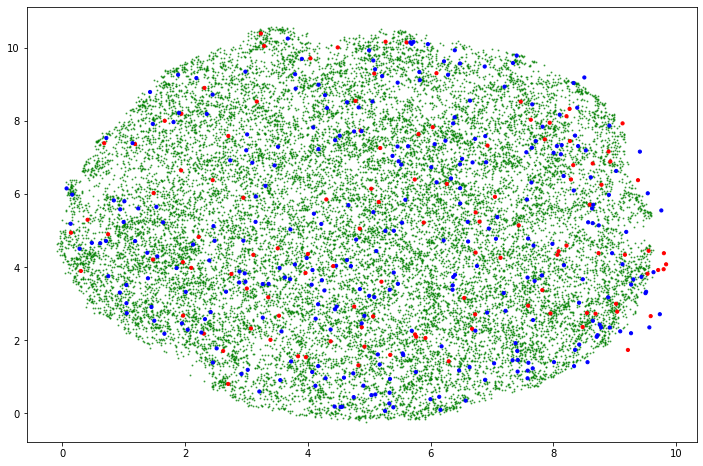

In [137]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_schiz[:,0], umap_schiz[:,1], s=10, c=colors, alpha=1)
plt.show()